In [40]:
import pandas
import pandas_datareader as web
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

## MACD

In [32]:
start = '2010-01-01'
end = '2013-01-27'
ticker = web.get_data_yahoo("AAPL", start, end)
ticker

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,3.524108e+08,6.482683
2010-01-04,7.660714,7.585000,7.622500,7.643214,4.937296e+08,6.583586
2010-01-05,7.699643,7.616071,7.664286,7.656429,6.019048e+08,6.594968
2010-01-06,7.686786,7.526786,7.656429,7.534643,5.521600e+08,6.490066
2010-01-07,7.571429,7.466071,7.562500,7.520714,4.771312e+08,6.478067
...,...,...,...,...,...,...
2013-01-18,17.936428,17.728571,17.804285,17.857143,4.729228e+08,15.518086
2013-01-22,18.138571,17.736786,18.020000,18.027500,4.615464e+08,15.666129
2013-01-23,18.392500,18.027500,18.171785,18.357500,8.615096e+08,15.952903


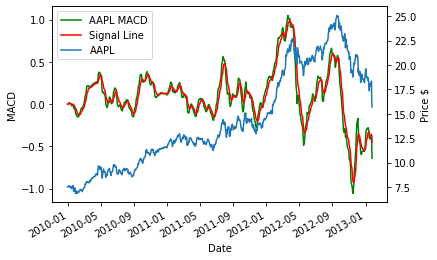

In [34]:
ticker = ticker["Close"]
exp1 = ticker.ewm(span=12, adjust=False).mean()
exp2 = ticker.ewm(span=26, adjust=False).mean()
macd = exp1 - exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
macd.plot(label='AAPL MACD', color='g')
ax = exp3.plot(label='Signal Line', color='r')
ticker.plot(ax=ax, secondary_y=True, label='AAPL')
ax.set_ylabel('MACD')
ax.right_ax.set_ylabel('Price $')
ax.set_xlabel('Date')
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper left')
plt.show()


## Relative Strength Index

In [35]:
# Window length for moving average
window_length = 14

# Dates
start = '2010-01-01'
end = '2013-01-27'

# Get data
data = web.DataReader('AAPL', 'yahoo', start, end)

In [36]:
# Get just the adjusted close
close = data['Adj Close']
# Get the difference in price from previous step
delta = close.diff()
# Get rid of the first row, which is NaN since it did not have a previous 
# row to calculate the differences
delta = delta[1:] 

# Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0

# Calculate the EWMA
roll_up1 = up.ewm(span=window_length).mean()
roll_down1 = down.abs().ewm(span=window_length).mean()

In [37]:
# Calculate the RSI based on EWMA
RS1 = roll_up1 / roll_down1
RSI1 = 100.0 - (100.0 / (1.0 + RS1))

In [38]:
# Calculate the SMA
roll_up2 = up.rolling(window_length).mean()
roll_down2 = down.abs().rolling(window_length).mean()

# Calculate the RSI based on SMA
RS2 = roll_up2 / roll_down2
RSI2 = 100.0 - (100.0 / (1.0 + RS2))

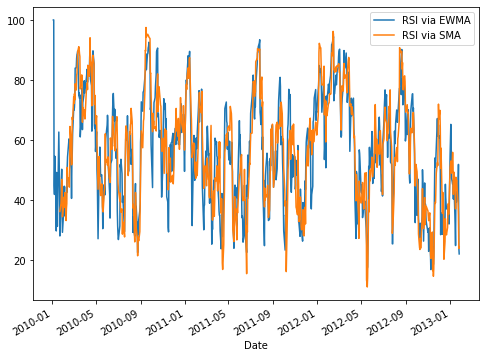

In [39]:
# Compare graphically
plt.figure(figsize=(8, 6))
RSI1.plot()
RSI2.plot()
plt.legend(['RSI via EWMA', 'RSI via SMA'])
plt.show()

## STOCHASTIC OSCILLATOR

In [41]:
start = '2010-01-01'
end = '2013-01-27'
ticker = web.get_data_yahoo("AAPL", start, end)
ticker

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,3.524108e+08,6.482683
2010-01-04,7.660714,7.585000,7.622500,7.643214,4.937296e+08,6.583586
2010-01-05,7.699643,7.616071,7.664286,7.656429,6.019048e+08,6.594968
2010-01-06,7.686786,7.526786,7.656429,7.534643,5.521600e+08,6.490066
2010-01-07,7.571429,7.466071,7.562500,7.520714,4.771312e+08,6.478067
...,...,...,...,...,...,...
2013-01-18,17.936428,17.728571,17.804285,17.857143,4.729228e+08,15.518086
2013-01-22,18.138571,17.736786,18.020000,18.027500,4.615464e+08,15.666129
2013-01-23,18.392500,18.027500,18.171785,18.357500,8.615096e+08,15.952903


In [42]:
ticker['14-high'] = ticker['High'].rolling(14).max()
ticker['14-low'] = ticker['Low'].rolling(14).min()
ticker['%K'] = (ticker['Close'] - ticker['14-low'])*100/(ticker['14-high'] - ticker['14-low'])
ticker['%D'] = ticker['%K'].rolling(3).mean()


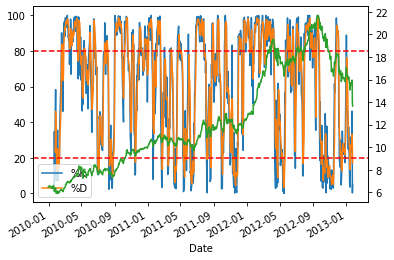

In [43]:
ax = ticker[['%K', '%D']].plot()
ticker['Adj Close'].plot(ax=ax, secondary_y=True)
ax.axhline(20, linestyle='--', color="r")
ax.axhline(80, linestyle="--", color="r")
plt.show()